### What are the most demanded skills for the top 3 most popular data roles?
#### Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Data
df = pd.read_csv('data_jobs.csv')

In [3]:
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_skills = df.explode('job_skills')

df_skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


In [5]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

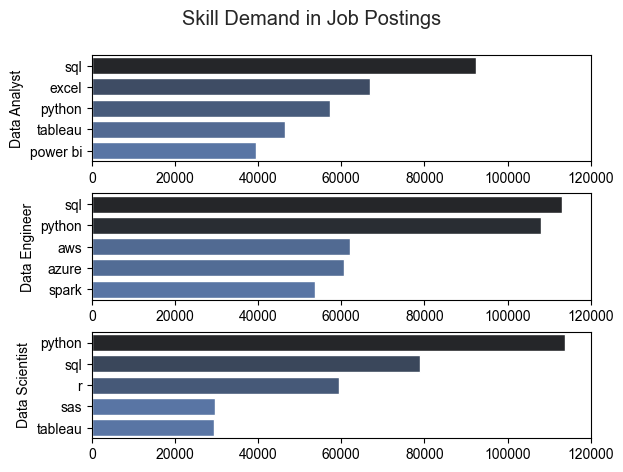

In [6]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for i, job in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job][:5]
    sns.barplot(data=df_plot, x="skill_count",y="job_skills",ax=ax[i], hue="skill_count", palette="dark:b_r", legend=False)
    ax[i].set_title("")
    ax[i].set_ylabel(job)
    ax[i].set_xlabel("")
    ax[i].set_xlim(0,120000)


fig.suptitle("Skill Demand in Job Postings")
fig.tight_layout(h_pad=0.5)
plt.show()

## Percentage

In [7]:
df_job_count = df["job_title_short"].value_counts().reset_index(name="count")
df_job_count

,job_title_short,count
0,Data Analyst,196075
1,Data Engineer,186241
2,Data Scientist,172286
3,Business Analyst,49063
4,Software Engineer,44929
5,Senior Data Engineer,44563
6,Senior Data Scientist,36957
7,Senior Data Analyst,29216
8,Machine Learning Engineer,14080
9,Cloud Engineer,12331


In [8]:
df_skills_perc = pd.merge(df_skills_count, df_job_count, how='left', on='job_title_short')
df_skills_perc["percentage"] = df_skills_perc["skill_count"] / df_skills_perc["count"] * 100
df_skills_perc

,job_title_short,job_skills,skill_count,count,percentage
0,Data Scientist,python,113711,172286,66.001300
1,Data Engineer,sql,113130,186241,60.743875
2,Data Engineer,python,108022,186241,58.001192
3,Data Analyst,sql,92428,196075,47.139105
4,Data Scientist,sql,78982,172286,45.843539
...,...,...,...,...,...
2251,Data Analyst,chainer,1,196075,0.000510
2252,Cloud Engineer,wrike,1,12331,0.008110
2253,Cloud Engineer,theano,1,12331,0.008110
2254,Business Analyst,chainer,1,49063,0.002038


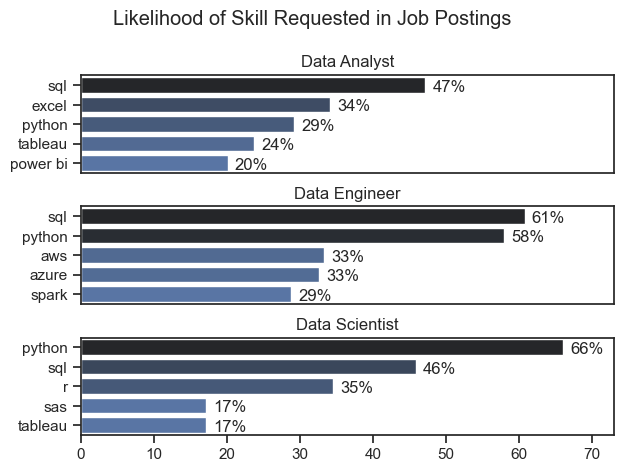

In [33]:
fig, ax  = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

for i,job in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc["job_title_short"] == job].head(5)
    sns.barplot(data=df_plot, x="percentage", y="job_skills", ax=ax[i], hue="percentage", palette="dark:b_r", legend=False)
    ax[i].set_title(job)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set_xlim(0,73)
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    for n,v in enumerate(df_plot["percentage"]):
        ax[i].text(v+1, n+0.1, f"{v:.0f}%", va='center')
# sns.despine()
fig.suptitle("Likelihood of Skill Requested in Job Postings")
fig.tight_layout(h_pad=.8)
plt.show()